### Setup
Importing required packages

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt 
import seaborn as sns
import ruptures as rpt

### Data 

In [89]:
overdoses = pd.read_csv("Overdoses.csv")
overdose_deaths = pd.read_csv("Overdose deaths.csv")

In [90]:
overdoses.head()

,Race,Sex,Age,D.O.D.,C.O.D.,Agency,Manner
0,W,F,30,01/02/2018,a) Fentanyl Intoxication,WCSP (Homer Glen),NaN
1,B,M,28,01/01/2018,"a) Cold Exposure, Part2: Phencyclidine Intoxic...",Joliet,NaN
2,B,M,46,01/05/2018,"a) Cocaine Intoxication, Part2: Coronary Ather...",Bolingbrook,NaN
3,W,M,34,01/06/2018,a) Fentanyl and Heroin Intoxication,New Lenox,NaN
4,W,M,35,01/08/2018,a) Fentanyl Intoxication,WCSP (Frankfort),NaN


In [91]:
overdoses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539 entries, 0 to 538
Data columns (total 7 columns):
Race      539 non-null object
Sex       539 non-null object
Age       539 non-null int64
D.O.D.    539 non-null object
C.O.D.    539 non-null object
Agency    523 non-null object
Manner    418 non-null object
dtypes: int64(1), object(6)
memory usage: 29.6+ KB


In [92]:
overdose_deaths.head()

,Race,Sex,Age,D.O.D.,C.O.D.,Agency,Manner
0,W,M,35,01/08/2018,a) Fentanyl Intoxication,WCSP (Frankfort),NaN
1,W,M,34,01/06/2018,a) Fentanyl and Heroin Intoxication,New Lenox,NaN
2,W,F,30,01/02/2018,a) Fentanyl Intoxication,WCSP (Homer Glen),NaN
3,W,F,37,01/14/2018,"a) Fentanyl, Cocaine, Heroin, and Alcohol Into...",Manhattan,NaN
4,W,M,32,01/24/2018,Fentanyl and Cocaine Intoxication,New Lenox,NaN


In [93]:
overdose_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 7 columns):
Race      379 non-null object
Sex       379 non-null object
Age       379 non-null int64
D.O.D.    379 non-null object
C.O.D.    379 non-null object
Agency    374 non-null object
Manner    297 non-null object
dtypes: int64(1), object(6)
memory usage: 20.8+ KB


In [94]:
#converting date(D.O.D.) to datetime

overdoses['Date'] = pd.to_datetime(overdoses['D.O.D.'])
overdose_deaths['Date'] = pd.to_datetime(overdose_deaths['D.O.D.'])



In [95]:
columns_for_analysis = ['Race', 'Sex', 'Age', 'Date']

overdoses = overdoses[columns_for_analysis]
overdose_deaths = overdose_deaths[columns_for_analysis]

In [96]:
overdose_deaths['Fatal'] = 'Y'

In [97]:
overdose_deaths.head()

,Race,Sex,Age,Date,Fatal
0,W,M,35,2018-01-08,Y
1,W,M,34,2018-01-06,Y
2,W,F,30,2018-01-02,Y
3,W,F,37,2018-01-14,Y
4,W,M,32,2018-01-24,Y


In [98]:
overdoses['Race'].value_counts()

W           446
B            78
M             6
Mexican       1
B/W           1
Hispanic      1
A             1
K             1
H             1
Asian         1
w             1
Korean        1
Name: Race, dtype: int64

In [99]:
overdose_deaths['Race'].value_counts()

W          325
B           47
M            2
w            2
Mexican      1
H            1
Asian        1
Name: Race, dtype: int64

In [100]:
overdoses['Sex'].value_counts()

M         392
F         142
W           2
Female      1
f           1
B           1
Name: Sex, dtype: int64

In [101]:
overdose_deaths['Sex'].value_counts()

M    288
F     90
W      1
Name: Sex, dtype: int64

In [102]:
#cleaning the Race and Sex column to distinguishable categories

overdoses.loc[overdoses['Race'] == 'w', 'Race'] = 'W'
overdoses.loc[overdoses['Race'] == 'M', 'Race'] = 'Other'
overdoses.loc[overdoses['Race'] == 'K', 'Race'] = 'Other'
overdoses.loc[overdoses['Race'] == 'Korean', 'Race'] = 'Other'
overdoses.loc[overdoses['Race'] == 'A', 'Race'] = 'Other'
overdoses.loc[overdoses['Race'] == 'H', 'Race'] = 'Other'
overdoses.loc[overdoses['Race'] == 'B/W', 'Race'] = 'Other'
overdoses.loc[overdoses['Race'] == 'Mexican', 'Race'] = 'Other'
overdoses.loc[overdoses['Race'] == 'Asian', 'Race'] = 'Other'
overdoses.loc[overdoses['Race'] == 'Hispanic', 'Race'] = 'Other'

overdose_deaths.loc[overdose_deaths['Race'] == 'w', 'Race'] = 'W'
overdose_deaths.loc[overdose_deaths['Race'] == 'M', 'Race'] = 'Other'
overdose_deaths.loc[overdose_deaths['Race'] == 'H', 'Race'] = 'Other'
overdose_deaths.loc[overdose_deaths['Race'] == 'Mexican', 'Race'] = 'Other'
overdose_deaths.loc[overdose_deaths['Race'] == 'Asian', 'Race'] = 'Other'

overdoses.loc[overdoses['Sex'] == 'Female', 'Sex'] = 'F'
overdoses.loc[overdoses['Sex'] == 'W', 'Sex'] = 'F'
overdoses.loc[overdoses['Sex'] == 'f', 'Sex'] = 'F'
overdoses.loc[overdoses['Sex'] == 'B', 'Sex'] = 'Other'

overdose_deaths.loc[overdose_deaths['Sex'] == 'W', 'Sex'] = 'F'


In [103]:
overdoses['Race'].value_counts()

W        447
B         78
Other     14
Name: Race, dtype: int64

In [104]:
overdose_deaths['Race'].value_counts()

W        327
B         47
Other      5
Name: Race, dtype: int64

In [105]:
overdoses['Sex'].value_counts()


M        392
F        146
Other      1
Name: Sex, dtype: int64

In [106]:
overdose_deaths['Sex'].value_counts()

M    288
F     91
Name: Sex, dtype: int64

In [107]:
merged_df = pd.merge(overdoses,overdose_deaths,how='outer',on=['Race', 'Sex', 'Age', 'Date'])

In [116]:
merged_df.head()

,Race,Sex,Age,Date,Fatal,year,month,dayofmonth
0,W,F,30,2018-01-02,Y,2018,1,2
1,B,M,28,2018-01-01,N,2018,1,1
2,B,M,46,2018-01-05,N,2018,1,5
3,W,M,34,2018-01-06,Y,2018,1,6
4,W,M,35,2018-01-08,Y,2018,1,8


In [109]:
merged_df["Fatal"].fillna("N", inplace = True)

In [110]:
merged_df.head()

,Race,Sex,Age,Date,Fatal
0,W,F,30,2018-01-02,Y
1,B,M,28,2018-01-01,N
2,B,M,46,2018-01-05,N
3,W,M,34,2018-01-06,Y
4,W,M,35,2018-01-08,Y


In [111]:
merged_df['year'] = merged_df['Date'].dt.year
merged_df['month'] = merged_df['Date'].dt.month
merged_df['dayofmonth'] = merged_df['Date'].dt.day


In [112]:
merged_df.head()

,Race,Sex,Age,Date,Fatal,year,month,dayofmonth
0,W,F,30,2018-01-02,Y,2018,1,2
1,B,M,28,2018-01-01,N,2018,1,1
2,B,M,46,2018-01-05,N,2018,1,5
3,W,M,34,2018-01-06,Y,2018,1,6
4,W,M,35,2018-01-08,Y,2018,1,8


### Analysis

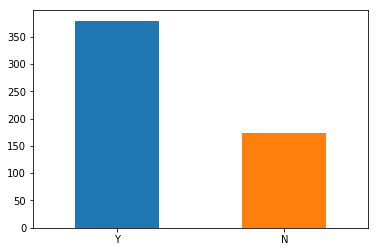

In [113]:
merged_df['Fatal'].value_counts().plot.bar(rot=0)

In [117]:
merged_df['count'] = 1

In [126]:
fatality_year = merged_df[['Fatal','year','count']].groupby(['Fatal','year']).count().reset_index()

fatality_year

,Fatal,year,count
0,N,2018,43
1,N,2019,43
2,N,2020,44
3,N,2021,43
4,Y,2018,82
5,Y,2019,103
6,Y,2020,84
7,Y,2021,110


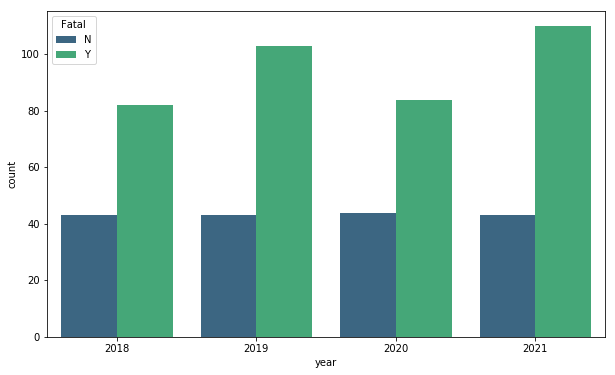

In [127]:
ax = sns.barplot(
    x="year", 
    y="count", 
    hue="Fatal",
    data=fatality_year, 
    palette='viridis',
    ci=None
    )
ax.figure.set_size_inches(10, 6)
ax.title("")

In [132]:
race_wise_fatality = merged_df[['Fatal','count','Race','year']].groupby(['Fatal','Race','year']).count().reset_index()
race_wise_fatality

,Fatal,Race,year,count
0,N,B,2018,9
1,N,B,2019,9
2,N,B,2020,4
3,N,B,2021,11
4,N,Other,2018,2
5,N,Other,2019,3
6,N,Other,2020,3
7,N,Other,2021,3
8,N,W,2018,32
9,N,W,2019,31


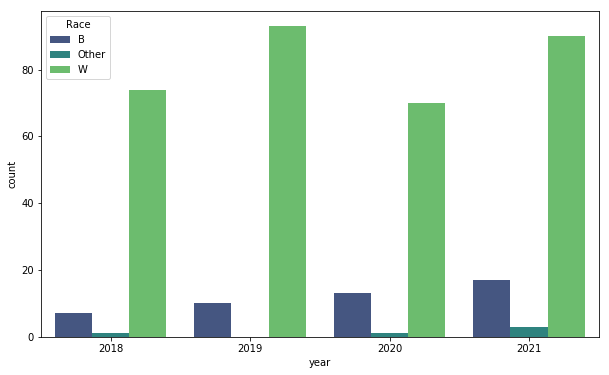

In [143]:

ax = sns.barplot(
    x="year", 
    y="count", 
    hue="Race",
    data=race_wise_fatality.loc[race_wise_fatality['Fatal'] == 'Y'], 
    palette='viridis',
    ci=None
    )
ax.figure.set_size_inches(10, 6)

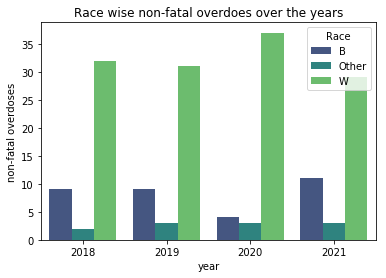

In [239]:

ax = sns.barplot(
    x="year", 
    y="count", 
    hue="Race",
    data=race_wise_fatality.loc[race_wise_fatality['Fatal'] == 'N'], 
    palette='viridis',
    ci=None
    ).set(title='Race wise non-fatal overdoes over the years', ylabel='non-fatal overdoses')



In [147]:
race_fatality = pd.merge(race_wise_fatality.loc[race_wise_fatality['Fatal'] == 'N'],race_wise_fatality.loc[race_wise_fatality['Fatal'] == 'Y'],how='outer',on=['Race', 'year'])
race_fatality

,Fatal_x,Race,year,count_x,Fatal_y,count_y
0,N,B,2018,9,Y,7.0
1,N,B,2019,9,Y,10.0
2,N,B,2020,4,Y,13.0
3,N,B,2021,11,Y,17.0
4,N,Other,2018,2,Y,1.0
5,N,Other,2019,3,NaN,NaN
6,N,Other,2020,3,Y,1.0
7,N,Other,2021,3,Y,3.0
8,N,W,2018,32,Y,74.0
9,N,W,2019,31,Y,93.0


In [148]:
race_fatality["Fatal_y"].fillna("Y", inplace = True)
race_fatality["count_y"].fillna(0, inplace = True)


In [149]:
race_fatality

,Fatal_x,Race,year,count_x,Fatal_y,count_y
0,N,B,2018,9,Y,7.0
1,N,B,2019,9,Y,10.0
2,N,B,2020,4,Y,13.0
3,N,B,2021,11,Y,17.0
4,N,Other,2018,2,Y,1.0
5,N,Other,2019,3,Y,0.0
6,N,Other,2020,3,Y,1.0
7,N,Other,2021,3,Y,3.0
8,N,W,2018,32,Y,74.0
9,N,W,2019,31,Y,93.0


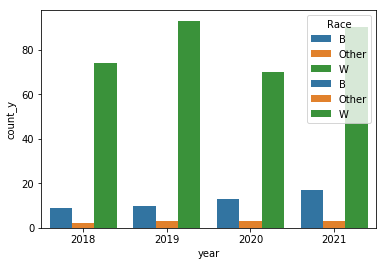

In [150]:
bar1 = sns.barplot(x="year",  y="count_x", hue="Race", data=race_fatality)
bar2 = sns.barplot(x="year", y="count_y", hue="Race", data=race_fatality, estimator=sum, ci=None)

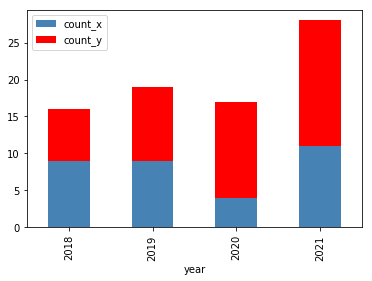

In [159]:
race_fatality.loc[(race_fatality['Race'] =='B')].set_index('year').plot(kind='bar', stacked=True, color=['steelblue', 'red'])

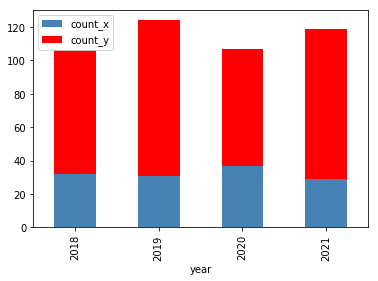

In [156]:
race_fatality.loc[(race_fatality['Race'] =='W')].set_index('year').plot(kind='bar', stacked=True, color=['steelblue', 'red'])

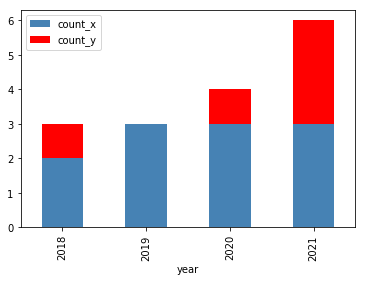

In [157]:
race_fatality.loc[(race_fatality['Race'] =='Other')].set_index('year').plot(kind='bar', stacked=True, color=['steelblue', 'red'])

In [163]:
import plotly.express as px
# This dataframe has 244 lines, but 4 distinct values for `day`
fig = px.pie(race_wise_fatality.loc[(race_wise_fatality['Race'] =='B') & (race_wise_fatality['year'] == 2019)], values='count', names='Fatal')
fig.show()

In [164]:
fig = px.pie(race_wise_fatality.loc[(race_wise_fatality['Race'] =='B') & (race_wise_fatality['year'] == 2020)], values='count', names='Fatal')
fig.show()

In [165]:
fig = px.pie(race_wise_fatality.loc[(race_wise_fatality['Race'] =='W') & (race_wise_fatality['year'] == 2019)], values='count', names='Fatal')
fig.show()

In [244]:
fig = px.pie(race_wise_fatality.loc[(race_wise_fatality['Race'] =='W') & (race_wise_fatality['year'] == 2020)], values='count', names='Fatal')
fig.show()

<function matplotlib.pyplot.show(*args, **kw)>

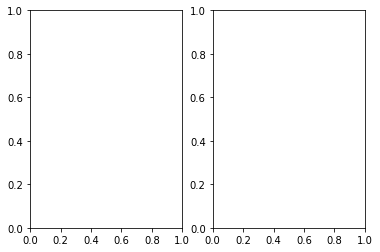

In [172]:
plt.subplot(1, 2, 1)
px.pie(race_wise_fatality.loc[(race_wise_fatality['Race'] =='B') & (race_wise_fatality['year'] == 2019)], values='count', names='Fatal')
plt.subplot(1, 2, 2) # index 2
px.pie(race_wise_fatality.loc[(race_wise_fatality['Race'] =='B') & (race_wise_fatality['year'] == 2020)], values='count', names='Fatal')
plt.show

Text(0.5,0.98,'Fatal and Non-fatal overdoses of African Americans 2019 vs 2020')

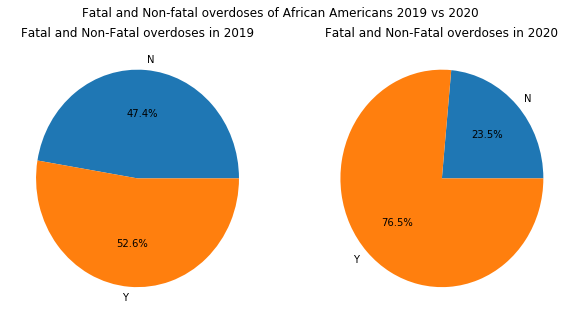

In [249]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5)) #ax1,ax2 refer to your two pies
# 1,2 denotes 1 row, 2 columns - if you want to stack vertically, it would be 2,1

labels =race_wise_fatality.loc[(race_wise_fatality['Race'] =='B') & (race_wise_fatality['year'] == 2019)]['Fatal']
values =race_wise_fatality.loc[(race_wise_fatality['Race'] =='B') & (race_wise_fatality['year'] == 2019)]['count']
ax1.pie(values,labels = labels,autopct = '%1.1f%%') #plot first pie
ax1.set_title('Fatal and Non-Fatal overdoses in 2019')


labels =race_wise_fatality.loc[(race_wise_fatality['Race'] =='B') & (race_wise_fatality['year'] == 2020)]['Fatal']
values =race_wise_fatality.loc[(race_wise_fatality['Race'] =='B') & (race_wise_fatality['year'] == 2020)]['count']
ax2.pie(values,labels = labels,autopct = '%1.1f%%') #plot second pie
ax2.set_title('Fatal and Non-Fatal overdoses in 2020')

fig.suptitle('Fatal and Non-fatal overdoses of African Americans 2019 vs 2020')

Text(0.5,0.98,'Fatal and Non-fatal overdoses of White people 2019 vs 2020')

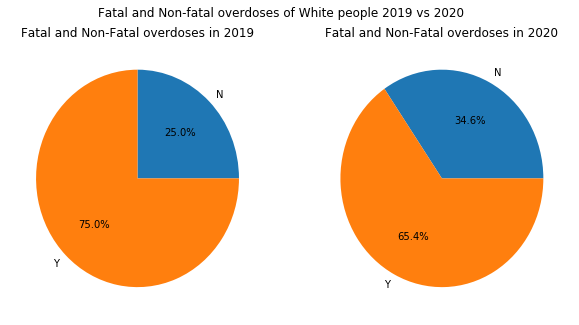

In [250]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5)) #ax1,ax2 refer to your two pies
# 1,2 denotes 1 row, 2 columns - if you want to stack vertically, it would be 2,1

labels =race_wise_fatality.loc[(race_wise_fatality['Race'] =='W') & (race_wise_fatality['year'] == 2019)]['Fatal']
values =race_wise_fatality.loc[(race_wise_fatality['Race'] =='W') & (race_wise_fatality['year'] == 2019)]['count']
ax1.pie(values,labels = labels,autopct = '%1.1f%%') #plot first pie
ax1.set_title('Fatal and Non-Fatal overdoses in 2019')


labels =race_wise_fatality.loc[(race_wise_fatality['Race'] =='W') & (race_wise_fatality['year'] == 2020)]['Fatal']
values =race_wise_fatality.loc[(race_wise_fatality['Race'] =='W') & (race_wise_fatality['year'] == 2020)]['count']
ax2.pie(values,labels = labels,autopct = '%1.1f%%') #plot second pie
ax2.set_title('Fatal and Non-Fatal overdoses in 2020')

fig.suptitle('Fatal and Non-fatal overdoses of White people 2019 vs 2020')

Text(0.5,0.98,'Fatal and Non-fatal overdoses of other races 2019 vs 2020')

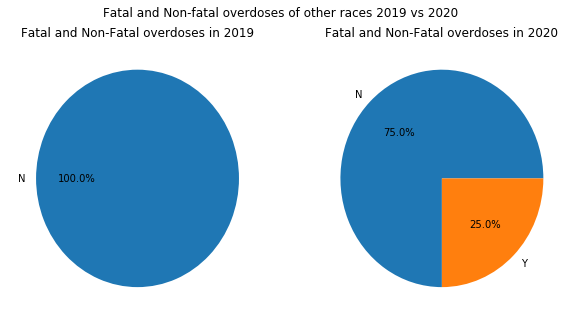

In [251]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5)) #ax1,ax2 refer to your two pies
# 1,2 denotes 1 row, 2 columns - if you want to stack vertically, it would be 2,1

labels =race_wise_fatality.loc[(race_wise_fatality['Race'] =='Other') & (race_wise_fatality['year'] == 2019)]['Fatal']
values =race_wise_fatality.loc[(race_wise_fatality['Race'] =='Other') & (race_wise_fatality['year'] == 2019)]['count']
ax1.pie(values,labels = labels,autopct = '%1.1f%%') #plot first pie
ax1.set_title('Fatal and Non-Fatal overdoses in 2019')


labels =race_wise_fatality.loc[(race_wise_fatality['Race'] =='Other') & (race_wise_fatality['year'] == 2020)]['Fatal']
values =race_wise_fatality.loc[(race_wise_fatality['Race'] =='Other') & (race_wise_fatality['year'] == 2020)]['count']
ax2.pie(values,labels = labels,autopct = '%1.1f%%') #plot second pie
ax2.set_title('Fatal and Non-Fatal overdoses in 2020')

fig.suptitle('Fatal and Non-fatal overdoses of other races 2019 vs 2020')

In [190]:
sex_wise_fatality = merged_df[['Fatal','count','Sex','year']].groupby(['Fatal','Sex','year']).count().reset_index()
sex_wise_fatality

,Fatal,Sex,year,count
0,N,F,2018,11
1,N,F,2019,18
2,N,F,2020,12
3,N,F,2021,18
4,N,M,2018,32
5,N,M,2019,24
6,N,M,2020,32
7,N,M,2021,25
8,N,Other,2019,1
9,Y,F,2018,24


Text(0.5,1,'Fatal and Non-Fatal overdoses in 2020')

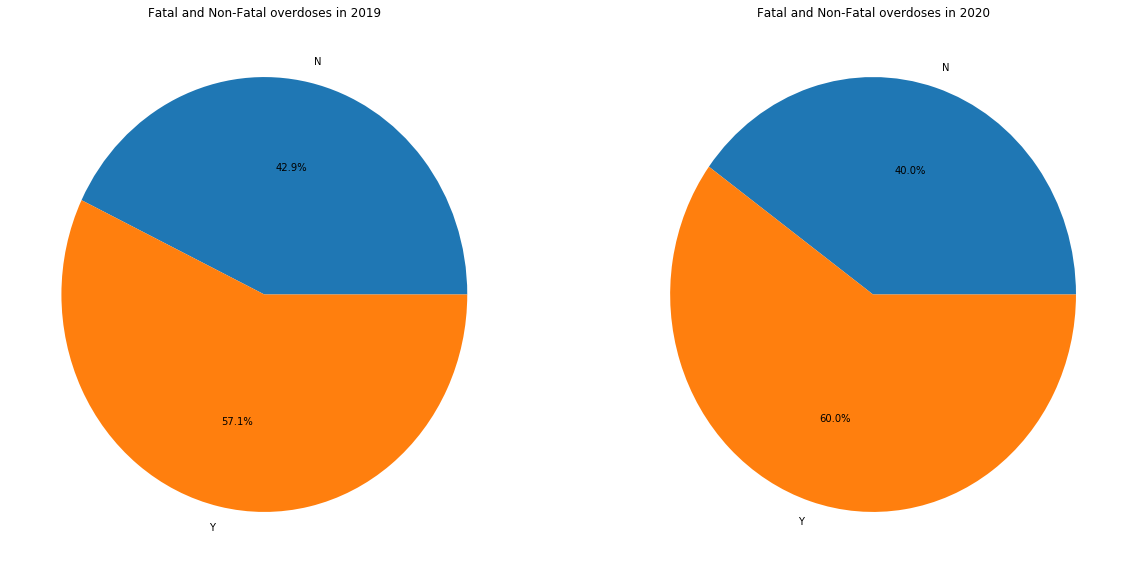

In [191]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,10)) #ax1,ax2 refer to your two pies
# 1,2 denotes 1 row, 2 columns - if you want to stack vertically, it would be 2,1

labels =sex_wise_fatality.loc[(sex_wise_fatality['Sex'] =='F') & (sex_wise_fatality['year'] == 2019)]['Fatal']
values =sex_wise_fatality.loc[(sex_wise_fatality['Sex'] =='F') & (sex_wise_fatality['year'] == 2019)]['count']
ax1.pie(values,labels = labels,autopct = '%1.1f%%') #plot first pie
ax1.set_title('Fatal and Non-Fatal overdoses in 2019')


labels =sex_wise_fatality.loc[(sex_wise_fatality['Sex'] =='F') & (sex_wise_fatality['year'] == 2020)]['Fatal']
values =sex_wise_fatality.loc[(sex_wise_fatality['Sex'] =='F') & (sex_wise_fatality['year'] == 2020)]['count']
ax2.pie(values,labels = labels,autopct = '%1.1f%%') #plot second pie
ax2.set_title('Fatal and Non-Fatal overdoses in 2020')

Text(0.5,1,'Fatal and Non-Fatal overdoses in 2020')

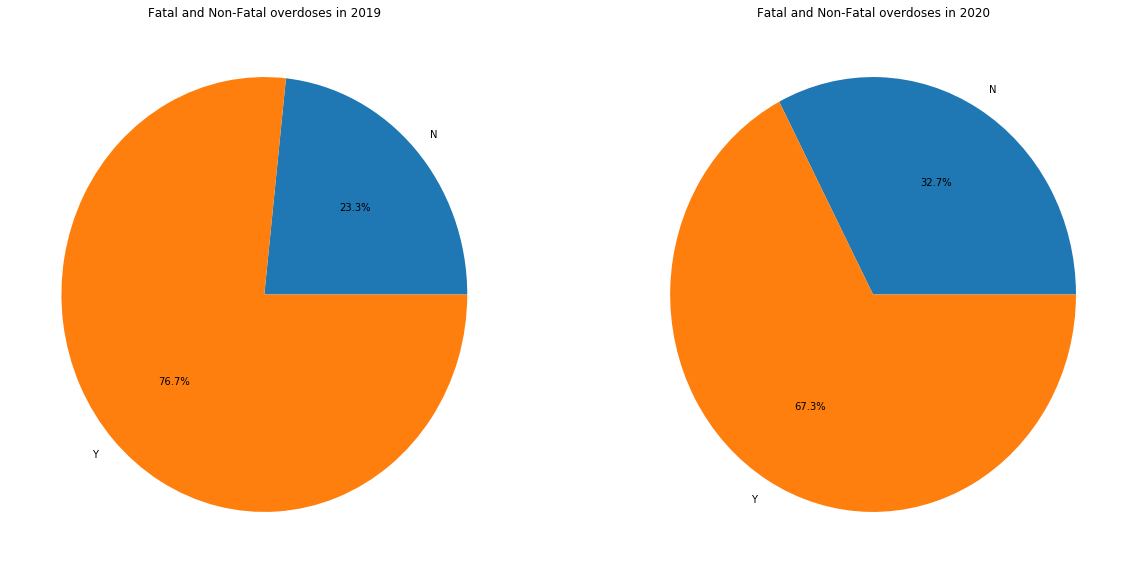

In [192]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,10)) #ax1,ax2 refer to your two pies
# 1,2 denotes 1 row, 2 columns - if you want to stack vertically, it would be 2,1

labels =sex_wise_fatality.loc[(sex_wise_fatality['Sex'] =='M') & (sex_wise_fatality['year'] == 2019)]['Fatal']
values =sex_wise_fatality.loc[(sex_wise_fatality['Sex'] =='M') & (sex_wise_fatality['year'] == 2019)]['count']
ax1.pie(values,labels = labels,autopct = '%1.1f%%') #plot first pie
ax1.set_title('Fatal and Non-Fatal overdoses in 2019')


labels =sex_wise_fatality.loc[(sex_wise_fatality['Sex'] =='M') & (sex_wise_fatality['year'] == 2020)]['Fatal']
values =sex_wise_fatality.loc[(sex_wise_fatality['Sex'] =='M') & (sex_wise_fatality['year'] == 2020)]['count']
ax2.pie(values,labels = labels,autopct = '%1.1f%%') #plot second pie
ax2.set_title('Fatal and Non-Fatal overdoses in 2020')

Text(0,0.5,'number of overdoses')

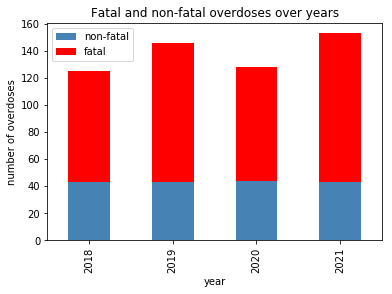

In [229]:
merged = pd.merge(fatality_year.loc[fatality_year['Fatal'] == 'N'],fatality_year.loc[fatality_year['Fatal'] == 'Y'],how='outer',on=['year'])
merged.rename(columns = {'count_x':'non-fatal', 'count_y':'fatal'}, inplace = True)
ax = merged.set_index('year').plot(kind='bar', stacked=True, color=['steelblue', 'red'], title='Fatal and non-fatal overdoses over years')
ax.set_ylabel("number of overdoses")
#merged
#ax.legend(labels=['Fatal', 'Non-fatal'])


Text(0,0.5,'number of overdoses')

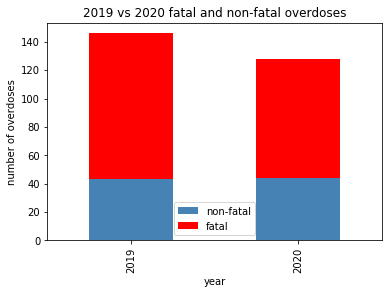

In [228]:

ax = merged.loc[(merged['year'] == 2019) | (merged['year'] == 2020)].set_index('year').plot(kind='bar', stacked=True, color=['steelblue', 'red'], title='2019 vs 2020 fatal and non-fatal overdoses')
ax.set_ylabel("number of overdoses")

In [210]:
fatality_monthly = (merged_df['Date'].value_counts()).to_frame()
fatality_monthly.resample('1M').sum()
#fatality_monthly = merged_df[['Fatal','year','month','count']].groupby(['Fatal','year', 'month']).count().reset_index()




KeyError: ('Date', 'Race')

In [ ]:
# Plotting employment counts by sector
plt.figure(figsize=(10,6))
sns.lineplot(data=fatality_monthly, x='month', y='count', hue='Race')
plt.title('Fatal Overdoses by Race')
plt.xlabel('Date')
plt.ylabel('Overdose Counts')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)